# Install Requirements (Expects CUDA 11.0)

In [1]:
!pip install librosa==0.8.0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 183.9/183.9 KB 5.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for librosa: filename=librosa-0.8.0-py3-none-any.whl size=201396 sha256=30333847e98ae697b32edb6691ce0386df0b984276e71e6c90a8d7f1d99f3134
  Stored in directory: /root/.cache/pip/wheels/aa/5a/92/d52f6f8560ff05a2525e6030a1903412df876714241fb76802
Successfully built librosa
  Attempting uninstall: librosa
    Found existing installation: librosa 0.8.1
    Uninstalling librosa-0.8.1:
      Successfully uninstalled librosa-0.8.1


In [2]:
!pip install gdown==4.2.0 tensorflow==2.4.1 numpy==1.19.5 scikit-image==0.17.2 librosa==0.8.0 matplotlib==3.3.3 scipy==1.5.4

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 394.4/394.4 MB 3.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.9/14.9 MB 42.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.4/12.4 MB 82.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.6/11.6 MB 95.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 25.8/25.8 MB 75.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.8/3.8 MB 15.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 88.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 KB 5.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

# Setup Tensorflow on GPU(s)

In [3]:
SELECTED_GPUS = [0]  # which GPUs to use

import os

os.environ['CUDA_VISIBLE_DEVICES'] = ','.join([str(gpu_number) for gpu_number in SELECTED_GPUS])

import tensorflow as tf 

tf.get_logger().setLevel('INFO')

GPUS = tf.config.experimental.list_physical_devices('GPU')
for gpu in GPUS:
    tf.config.experimental.set_memory_growth(gpu, True)

# Download Pre-Trained Model

In [4]:
import gdown
model_path = 'av_cc_backbone_v10.h5'
!pip install --upgrade --no-cache-dir gdown
!gdown --id 1vlnc6h8sZ_kL5w7QaQtJ2USAZ3FxjIsj

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Attempting uninstall: gdown
    Found existing installation: gdown 4.2.0
    Uninstalling gdown-4.2.0:
      Successfully uninstalled gdown-4.2.0


/usr/local/lib/python3.8/dist-packages/gdown/cli.py:121: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1vlnc6h8sZ_kL5w7QaQtJ2USAZ3FxjIsj
To: /content/av_cc_backbone_v10.h5
100% 274M/274M [00:02<00:00, 95.4MB/s]


# Download and Unzip Data

In [5]:
!gdown --id 1d4xS_pXhLUklej9i7sKzW8E28ZbnEmPT 

/usr/local/lib/python3.8/dist-packages/gdown/cli.py:121: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1d4xS_pXhLUklej9i7sKzW8E28ZbnEmPT
To: /content/samples.zip
100% 2.56M/2.56M [00:00<00:00, 157MB/s]


In [6]:
!apt-get install unzip
!unzip samples.zip

Reading package lists... Done
Building dependency tree       
Reading state information... Done
unzip is already the newest version (6.0-25ubuntu1.1).
0 upgraded, 0 newly installed, 0 to remove and 22 not upgraded.
Archive:  samples.zip
   creating: samples/
  inflating: samples/3.wav           
  inflating: samples/1.wav           
  inflating: samples/5.wav           
  inflating: samples/5.mat           
  inflating: samples/3.jpg           
  inflating: samples/4.mat           
  inflating: samples/1.jpg           
  inflating: samples/2.wav           
  inflating: samples/1.mat           
   creating: samples/.ipynb_checkpoints/
  inflating: samples/4.jpg           
  inflating: samples/2.mat           
  inflating: samples/4.wav           
  inflating: samples/5.jpg           
  inflating: samples/2.jpg           
  inflating: samples/3.mat           


# Download and Modify the Code for Extracting Spectrograms from Raw Audio

In [7]:
import urllib.request

download_list = [
    (
        'https://raw.githubusercontent.com/DTaoo/VGGish/master/mel_features.py',
        'mel_features.py'
    ),
    (
        'https://raw.githubusercontent.com/DTaoo/VGGish/master/preprocess_sound.py',
        'preprocess_sound.py'
    ),
    (
        'https://raw.githubusercontent.com/DTaoo/VGGish/master/vggish_params.py',
        'vggish_params.py'
    )
]

for url, file_path in download_list:
    if not os.path.exists(file_path):
        urllib.request.urlretrieve(url, file_path)

In [8]:
# Solving this issue: https://github.com/DTaoo/VGGish/issues/11
params_path = 'vggish_params.py'
with open(params_path, 'rt') as read_file:
    text = read_file.read()
with open(params_path, 'wt') as write_file:
    write_file.write(text.replace('496', '96').replace('4.96', '0.96'))

# Read Input Data and Retrieve Model Output

In [9]:
import librosa
import matplotlib.pyplot as plt
import numpy as np
import scipy.io
from preprocess_sound import preprocess_sound
from skimage.transform import resize

sample_number = 1  # 1 to 5
head_annotation_path = 'samples/%d.mat' % sample_number
image_path = 'samples/%d.jpg' % sample_number
audio_path = 'samples/%d.wav' % sample_number
sampling_rate = 48000

head_annotation = scipy.io.loadmat(head_annotation_path)['map']
count = np.sum(head_annotation)

image = plt.imread(image_path, format='jpeg')
resized_image = resize(image, (576, 1024))

waveform, _ = librosa.load(audio_path, sr=sampling_rate)
mel_spectrogram = preprocess_sound(waveform, sampling_rate)
mel_spectrogram = np.moveaxis(mel_spectrogram, 0, -1)

model = tf.keras.models.load_model(model_path, compile=False)
density_map_prediction = model([
    np.expand_dims(mel_spectrogram, axis=0),
    np.expand_dims(resized_image, axis=0)
])
count_prediction = np.sum(density_map_prediction)

# Visualize Input Data and Model Output

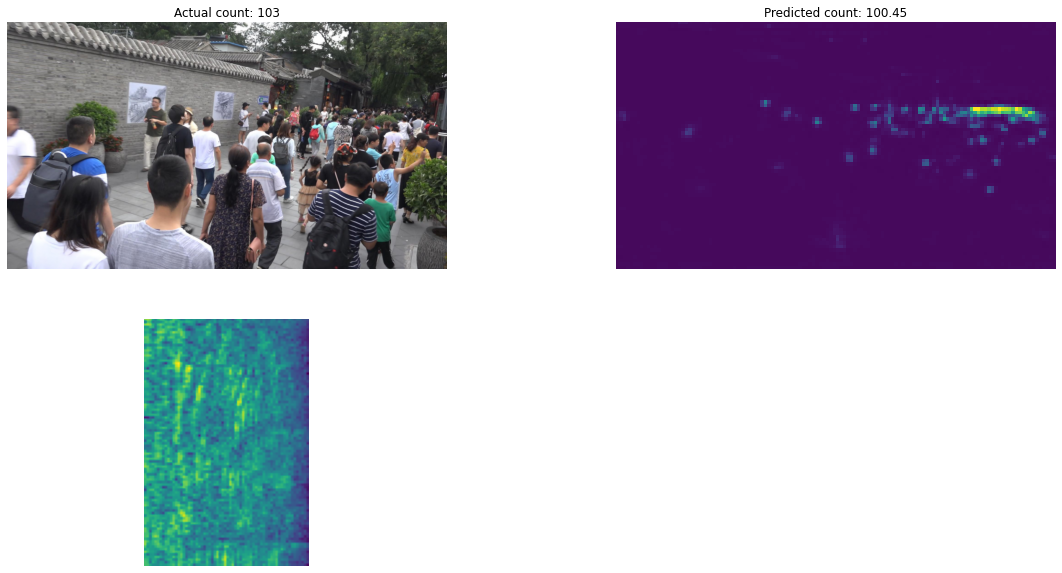

In [10]:
def visualize_data(image, density_map, spectrogram, count, count_prediction):
    fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(20, 10))
    fig.delaxes(ax4)
    ax1.imshow(image)
    ax1.set_title('Actual count: %d' % count)
    ax2.imshow(density_map)
    ax2.set_title('Predicted count: %.2f' % count_prediction)
    ax3.imshow(spectrogram)
    ax1.axis('off')
    ax2.axis('off')
    ax3.axis('off')
    plt.show()

visualize_data(resized_image, density_map_prediction[0], mel_spectrogram, count, count_prediction)